In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [42]:
df=pd.read_csv('/content/Height-Weight Data.csv')

In [43]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [44]:
df.shape

(3501, 2)

In [45]:
row , col = df.shape


In [46]:
row

3501

In [47]:
col

2

In [48]:
df.tail()


,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [49]:
df[25:31]

,Height,Weight
25,68.144033,192.343977
26,69.089631,184.435174
27,72.800844,206.828189
28,67.421242,175.213922
29,68.496415,154.342639
30,68.618111,187.506843


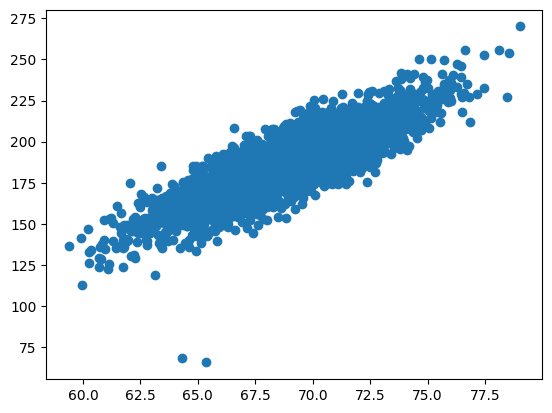

In [50]:
plt.scatter(df.Height , df.Weight)

Text(0.5, 1.0, 'Height_weigth data')

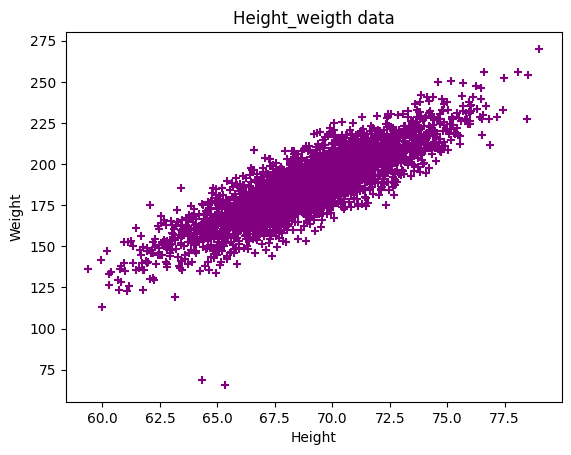

In [51]:
plt.scatter(df[['Height']],df[['Weight']], color="purple", marker="+")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height_weigth data')

In [52]:
df.Height.mean()

69.02441087268781

In [53]:
df.Weight.mean()

186.891257979463

In [54]:
x=df[['Height']]
y=df['Weight']

In [55]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [56]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split as tts

In [58]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.33,random_state=1)

In [59]:
xtrain.head()

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [60]:
ytrain.head()

166     162.779583
1011    185.842622
1344    179.115883
1563    188.656335
476     176.141239
Name: Weight, dtype: float64

In [61]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [62]:
ytest.head()

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
Name: Weight, dtype: float64

linear regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
reg=LinearRegression()

In [65]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [66]:
reg.predict([[67.750330]])

array([179.16098311])

In [67]:
m=reg.coef_
m

array([5.9467582])

In [68]:
c=reg.intercept_
c

-223.73384718970993

In [69]:
predicted= (m*67.750330)+c
predicted

array([179.16098311])

In [70]:
reg.predict([[67.750330]])

array([179.16098311])

In [71]:
df2=df.copy()

In [72]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [74]:
df2['predicted']=reg.predict(df[['Height']])
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


best fit line

Text(0.5, 1.0, 'Height_weigth data')

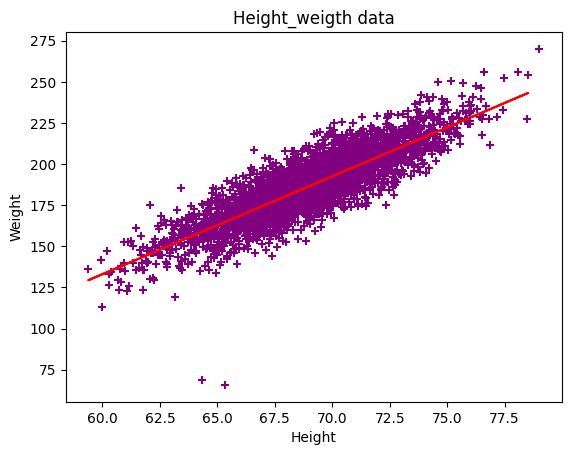

In [77]:
plt.scatter(df[['Height']],df[['Weight']], color="purple", marker="+")
plt.plot(xtest, reg.predict(xtest) ,color="red")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height_weigth data')

Text(0.5, 1.0, 'Height_weigth data')

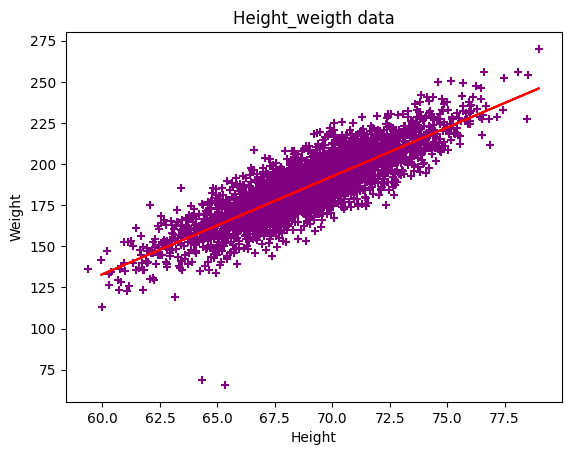

In [78]:
plt.scatter(df[['Height']],df[['Weight']], color="purple", marker="+")
plt.plot(xtrain, reg.predict(xtrain) ,color="red")
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height_weigth data')

error

In [79]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [81]:
#testing mse
test_mse = mean_squared_error(ytest, reg.predict(xtest))
test_mse

111.14654406073984

In [85]:
#testing mae
test_mae = mean_absolute_error(ytest, reg.predict(xtest))
test_mae

8.29430074943638

In [82]:
#traning mse
traning_mse = mean_squared_error(ytrain, reg.predict(xtrain))
traning_mse

103.4875929238486

In [84]:
#traning mae
traning_mae = mean_absolute_error(ytrain, reg.predict(xtrain))
traning_mae

7.95548845242242